In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train.drop(labels=["label"],axis=1)
Y = train["label"]

In [6]:
X_test = test

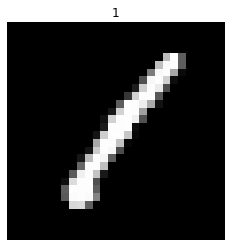

In [7]:
img = X.iloc[0].to_numpy()
img = img.reshape((28, 28)) #28*28=784
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title(Y.iloc[0])
plt.show()

In [8]:
X = X / 255.0
X_test = X_test / 255.0

X = X.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

print("X Train Shape: ",X.shape)
print("X Test Shape: ",X_test.shape)

X Train Shape:  (42000, 28, 28, 1)
X Test Shape:  (28000, 28, 28, 1)


In [9]:
Y = np_utils.to_categorical(Y, 10)
Y.shape

(42000, 10)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

In [21]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1182/1182 [==============================] - 48s 41ms/step - loss: 2.2825 - accuracy: 0.1184 - val_loss: 0.6849 - val_accuracy: 0.7900
Epoch 2/20
1182/1182 [==============================] - 48s 41ms/step - loss: 0.2726 - accuracy: 0.9204 - val_loss: 0.2055 - val_accuracy: 0.9395
Epoch 3/20
1182/1182 [==============================] - 48s 40ms/step - loss: 0.1599 - accuracy: 0.9538 - val_loss: 0.1668 - val_accuracy: 0.9521
Epoch 4/20
1182/1182 [==============================] - 50s 42ms/step - loss: 0.1224 - accuracy: 0.9639 - val_loss: 0.1436 - val_accuracy: 0.9586
Epoch 5/20
1182/1182 [==============================] - 46s 39ms/step - loss: 0.0998 - accuracy: 0.9707 - val_loss: 0.1212 - val_accuracy: 0.9633
Epoch 6/20
1182/1182 [==============================] - 49s 41ms/step - loss: 0.0800 - accuracy: 0.9765 - val_loss: 0.1183 - val_accuracy: 0.9657
Epoch 7/20
1182/1182 [==============================] - 42s 36ms/step - loss: 0.0634 - accuracy: 0.9820 - val_loss: 0.1033 -

In [15]:
score = model.evaluate(X_val, Y_val, verbose=0)
score

[0.08062150329351425, 0.9778571724891663]


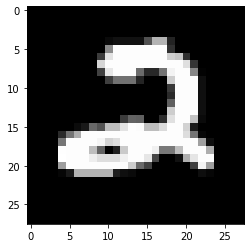

In [16]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [17]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Predicted value: {}'.format(np.argmax(y_predict)))

Predicted value: 2


In [18]:
model.save('digit_reg.h5')

In [19]:
Y_pred = model.predict(X_test)

In [20]:
Y_pred.shape

(28000, 10)

In [21]:
Y_pre = []
for i in range(Y_pred.shape[0]):
    Y_pre.append([i + 1, Y_pred[i].argmax()])

In [22]:
sub = pd.DataFrame(Y_pre, columns=['ImageId', 'Label'])
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [23]:
sub.to_csv('submission.csv', index=False)